### Import Librarries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_csv('Diamond Price.csv')

## Get information about data

In [3]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [6]:
df.columns = ['Weight', 'Cut_Quality', 'Color', 'Clarity', 'Depth',
       'Table', 'Price', 'X_length', 'Y_width', 'Z_Depth']

In [7]:
df

,Weight,Cut_Quality,Color,Clarity,Depth,Table,Price,X_length,Y_width,Z_Depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df['Cut_Quality'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: Cut_Quality, dtype: int64

In [9]:
df['Color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64

In [10]:
df['Clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64

In [11]:
df.describe()

,Weight,Depth,Table,Price,X_length,Y_width,Z_Depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


-------------------

## Data cleaning

--------------------

### duplicates handling

In [12]:
df[df.duplicated()]

,Weight,Cut_Quality,Color,Clarity,Depth,Table,Price,X_length,Y_width,Z_Depth
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [13]:
df.drop_duplicates(inplace=True)

--------------

### null data

In [14]:
df.isnull().sum()

Weight         0
Cut_Quality    0
Color          0
Clarity        0
Depth          0
Table          0
Price          0
X_length       0
Y_width        0
Z_Depth        0
dtype: int64

----------

### Detect and remove outliers

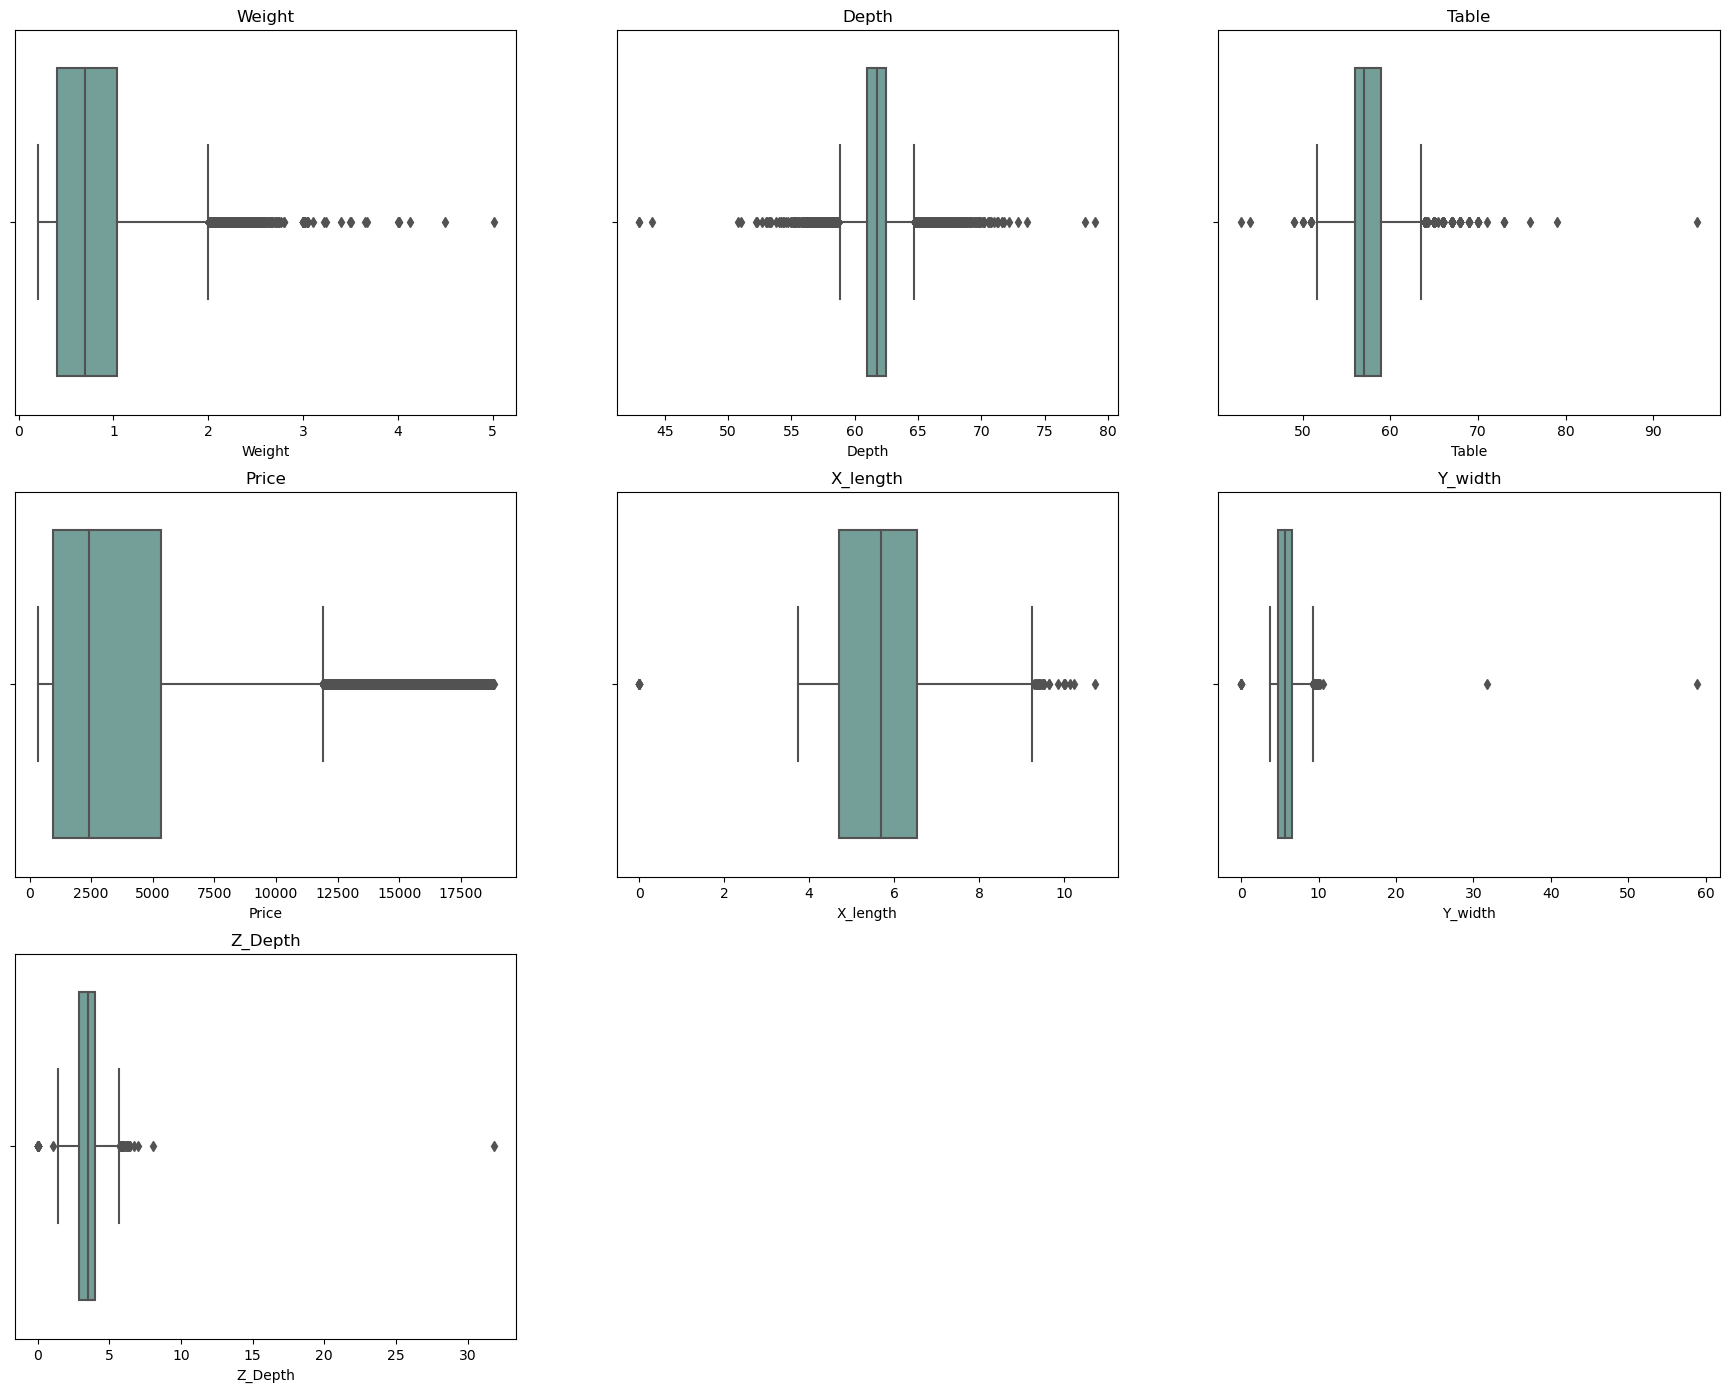

In [15]:
numeric_cols = ['Weight', 'Depth','Table', 'Price', 'X_length', 'Y_width', 'Z_Depth']
plt.figure(figsize=(22, 17))
for i in range(7) :
    plt.subplot(3,3,i+1)
    
    sns.boxplot(x=df[numeric_cols[i]],color='#6DA59D')
    plt.title(numeric_cols[i])
plt.show()

In [16]:
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]
    
    return ls

In [17]:

index_list = []

for column in numeric_cols:
    index_list.extend(detect_outliers(df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))


In [18]:
before_remove = df.shape
df =df.drop(index_list)
after_remove = df.shape

In [19]:
print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (53794, 10)
Shape of data after remove : (47416, 10)


---------------------

## Data visualization

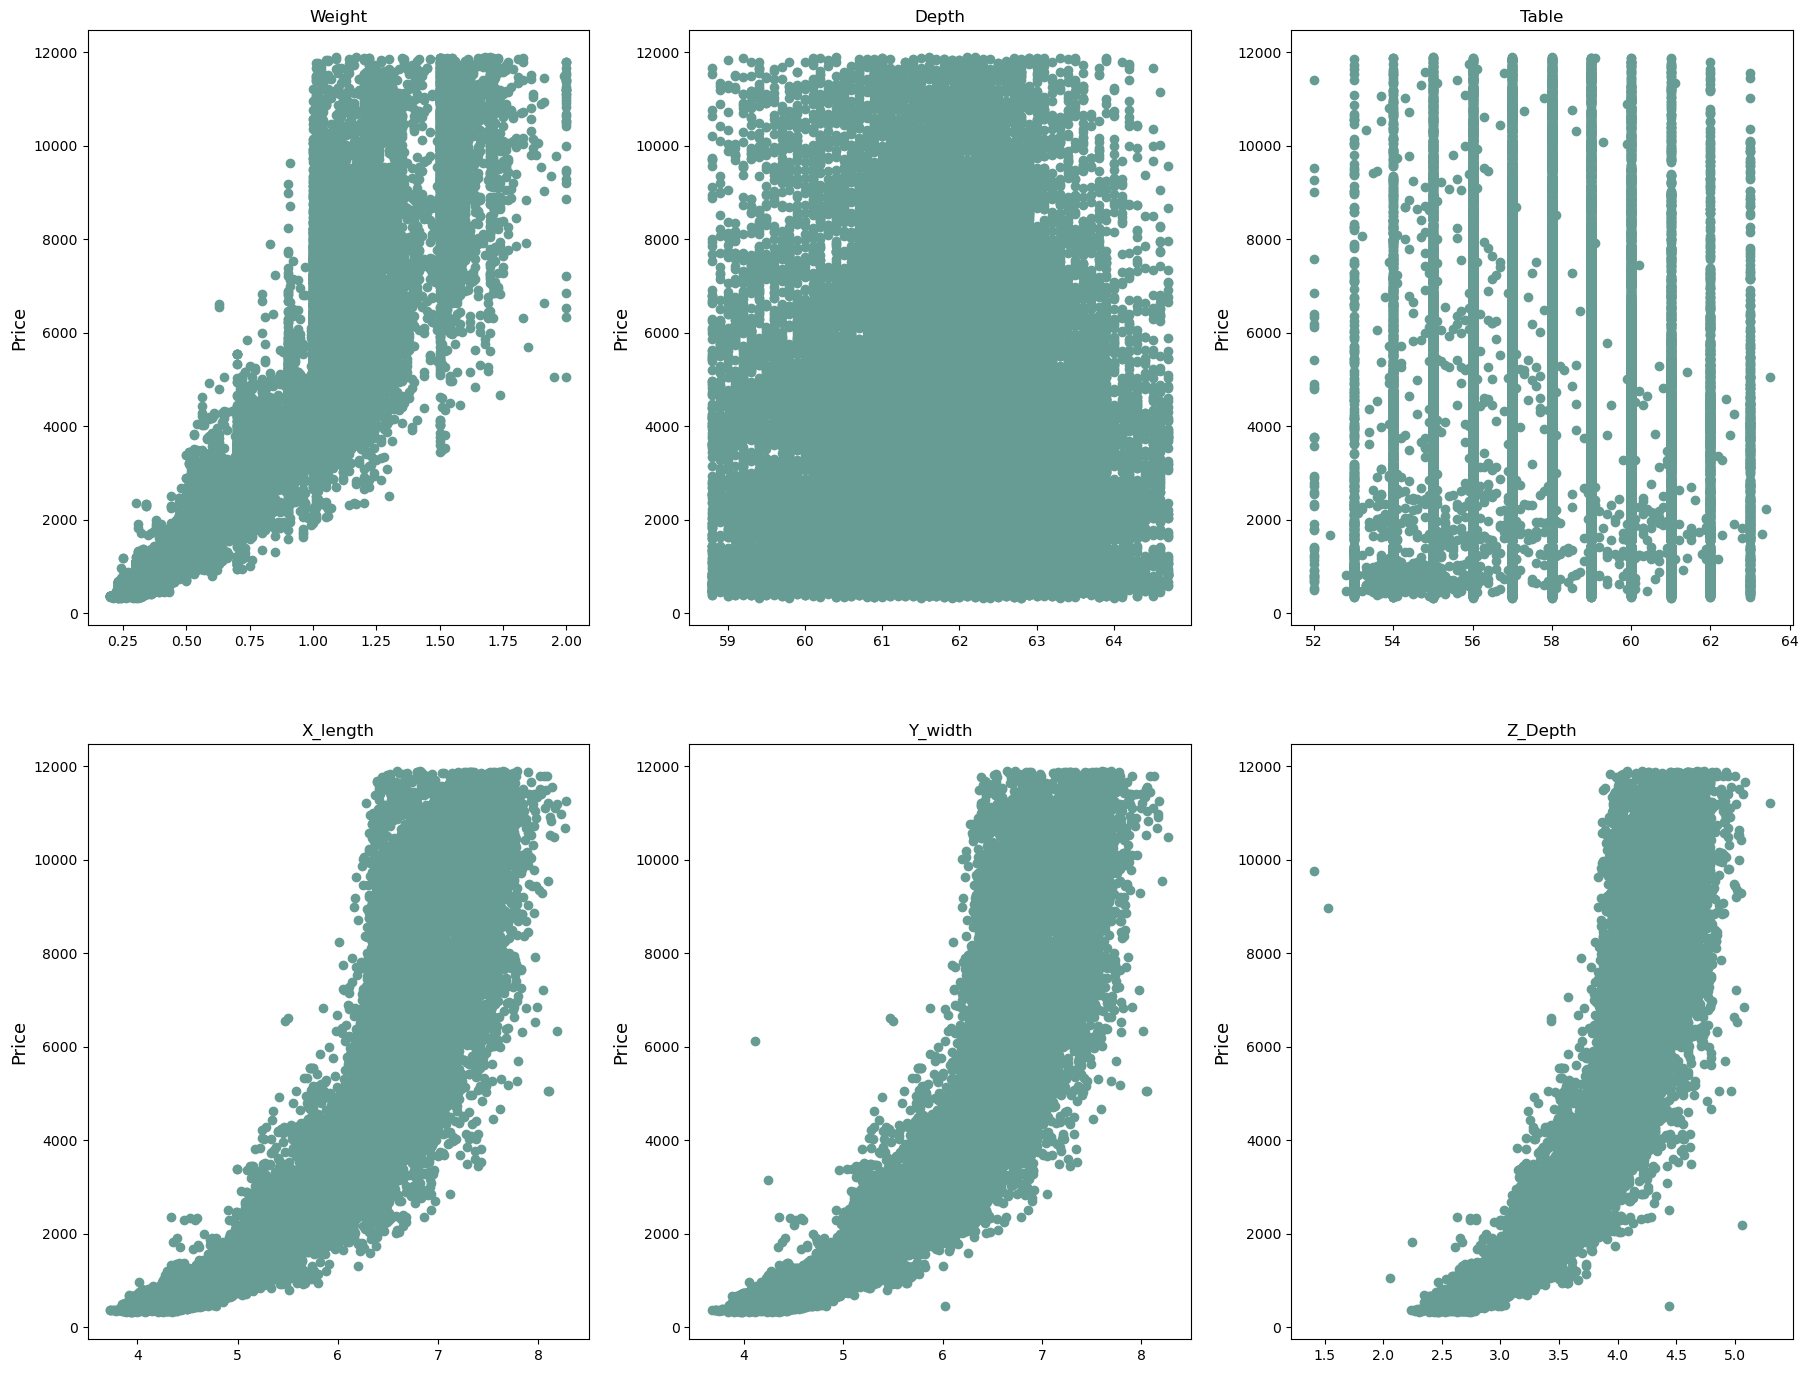

In [20]:
cols = ['Weight', 'Depth','Table', 'X_length', 'Y_width', 'Z_Depth']
plt.figure(figsize=(22, 17))
for i in range(6) :
    plt.subplot(2,3,i+1)
    #sns.set()
    plt.scatter(df[cols[i]],df['Price'],color='#679C94')
    plt.title(cols[i])
    plt.ylabel('Price',size=13)
plt.show()

#### -> we can see the relation between all factors of the diamond and the price 

In [21]:
quality = df.groupby('Cut_Quality').mean().sort_values('Price',ascending=False)
quality = quality[['Price']].round(2)
quality.reset_index(inplace=True)
quality 

,Cut_Quality,Price
0,Fair,3701.98
1,Premium,3485.01
2,Very Good,3222.78
3,Good,3215.51
4,Ideal,2801.71


<function matplotlib.pyplot.show(close=None, block=None)>

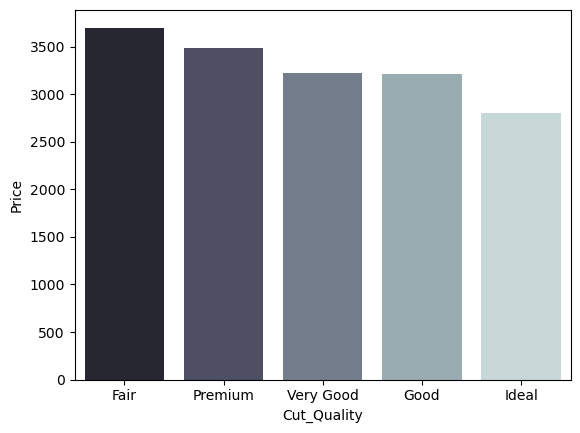

In [22]:
sns.barplot(x= quality['Cut_Quality'],y=quality['Price'], palette='bone')
plt.show

#### -> we see the average price for every cut quality

In [23]:
color = df.groupby('Color').mean().sort_values('Price',ascending=False)
color = color[['Price']].round(2)
color.reset_index(inplace=True)
color 

,Color,Price
0,J,3895.46
1,I,3627.18
2,H,3507.42
3,G,3209.37
4,F,3069.83
5,D,2654.11
6,E,2588.76


<function matplotlib.pyplot.show(close=None, block=None)>

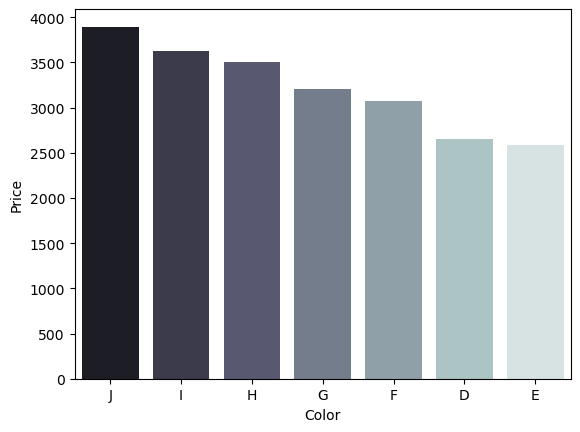

In [24]:
sns.barplot(x= color['Color'],y=color['Price'], palette='bone')
plt.show

#### -> we see the average price for each color 

In [25]:
clarity = df.groupby('Clarity').mean().sort_values('Price',ascending=False)
clarity = clarity[['Price']].round(2)
clarity.reset_index(inplace=True)
clarity 

,Clarity,Price
0,SI2,3760.29
1,I1,3296.18
2,SI1,3260.29
3,VS1,3142.50
4,VS2,3092.77
5,VVS2,2782.27
6,VVS1,2125.65
7,IF,2119.54


<function matplotlib.pyplot.show(close=None, block=None)>

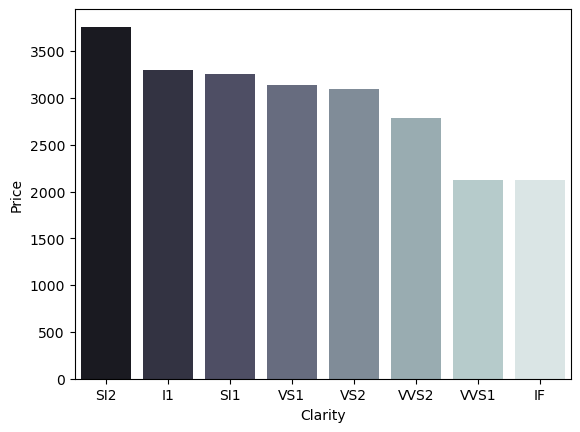

In [26]:
sns.barplot(x= clarity['Clarity'],y=clarity['Price'], palette='bone')
plt.show

#### -> we see the average price for each clarity degree 

-----------------

### Data correlation

<AxesSubplot:>

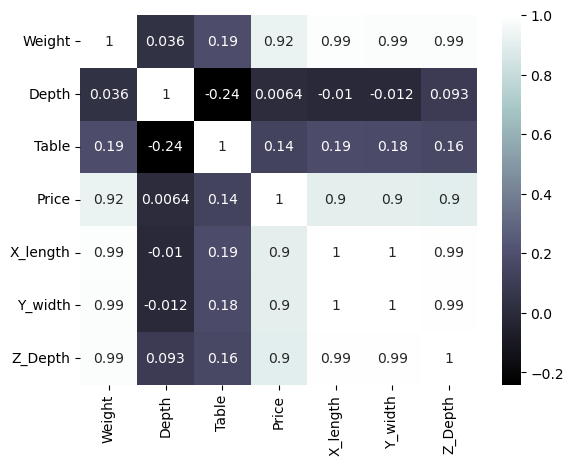

In [27]:
sns.heatmap(df.corr(),annot = True,cmap='bone')

_________________

## Building ML models

In [50]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

### Data preprocessing

#### Encoding

In [29]:
df['Cut_Quality'] = df['Cut_Quality'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
df['Color'] = df['Color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
df['Clarity'] = df['Clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

### Split data [feature - target] feature selection

In [30]:
x=df[['Weight', 'Cut_Quality', 'Color', 'Clarity',  
       'X_length', 'Y_width', 'Z_Depth']]
y=df[['Price']]

##### -> from  the corrrelation heatmap : the relation between  [Depth - Taple] features with the target we didn't put it in 'x' list (features passed to the model) 

### Scalling

In [31]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

### Split data [train - test]

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,shuffle=True)

----------------

### Model build 

------------------------
### Regression model 

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
print(f''' The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')


 The train accuracy : 0.9151818749809592
The test accuracy : 0.9114131841326967


### Ridge model 

In [37]:
r_model = Ridge(alpha=2)
r_model.fit(x_train,y_train)

Ridge(alpha=2)

In [38]:
rg_pred = r_model.predict(x_test)

In [39]:
print(f''' The train accuracy : {r2_score(y_train,r_model.predict(x_train))}
The test accuracy : {r2_score(y_test,rg_pred)}''')


 The train accuracy : 0.9151808700998215
The test accuracy : 0.9114022631166341


### Lasso model 

In [40]:
l_model = Lasso(alpha=2)
l_model.fit(x_train , y_train)

Lasso(alpha=2)

In [41]:
ls_pred = l_model.predict(x_test)

In [42]:
print(f''' The train accuracy : {r2_score(y_train,l_model.predict(x_train))}
The test accuracy : {r2_score(y_test,ls_pred)}''')

 The train accuracy : 0.9148186883254528
The test accuracy : 0.9107726295925066


### Polynomial Regression 

In [43]:
polynomial = PolynomialFeatures(degree=3)
x_poly = polynomial.fit_transform(x)


In [44]:
p_x_train , p_x_test , p_y_train , p_y_test = train_test_split(x_poly,y,test_size=.2,shuffle=True)

In [45]:
model2 = LinearRegression()
model2.fit(p_x_train,p_y_train)

LinearRegression()

In [46]:
p_pred = model2.predict(p_x_test)

In [47]:
print(f''' The train accuracy : {r2_score(p_y_train,model2.predict(p_x_train))}
The test accuracy : {r2_score(p_y_test,p_pred)}''')



 The train accuracy : 0.9784012285108165
The test accuracy : 0.9748440293196369


### Random forest regression model 

In [51]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
random_f_pred = random_forest.predict(x_test)

In [53]:
r2_score(y_test,random_f_pred)

0.9829248630505233

------------------
### Cross validation apply on Regression model

In [48]:
scores = cross_val_score(LinearRegression(),x_train, y_train ,cv=6)
print('The accuracy of cross validation applying on regression model : ',scores.mean())

The accuracy of cross validation applying on regression model :  0.9151045263881336


------------------------------

###  Results 
#### - We achived [.98] accuracy value by the [Random Forest Regressor ]